# Predict House Sales in King County, Washington State USA Using Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#create evaluation metrics
evaluation = pd.DataFrame({'Model':[],
                           'Details':[],
                           'Mean Squared Error(MSE)':[],
                           'R-squared(training)':[],
                           'Adjusted R-squared(training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

The code defines an empty pandas DataFrame named "evaluation" with columns to store evaluation metrics for different models. Here's a brief explanation of each column:

    'Model': Stores the names or labels of different models.
    'Details': Contains additional information or details about each model.
    'Mean Squared Error(MSE)': Stores the mean squared error values, a metric used to measure the accuracy of regression models.
    'R-squared(training)': Stores the R-squared values on the training data, indicating how well the model fits the training dataset.
    'Adjusted R-squared(training)': Stores the adjusted R-squared values on the training data, which considers the number of predictors in the model and prevents overfitting.
    'R-squared (test)': Stores the R-squared values on the test data, evaluating the model's performance on unseen data.
    'Adjusted R-squared (test)': Stores the adjusted R-squared values on the test data, similar to the previous column but adjusted for the number of predictors.

In [3]:
#read and explore data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:

train_data,test_data = train_test_split(df,train_size = 0.8, random_state=3)
#This line splits the dataset df into training and testing subsets. It assigns 80% of the data to the train_data variable and 20% to the test_data variable. The random_state parameter ensures reproducibility of the split.

lr = linear_model.LinearRegression()#This line creates an instance of the LinearRegression class from the linear_model module. It initializes a linear regression model.
X_train = np.array(train_data['sqft_living'], dtype = pd.Series).reshape(-1,1)#This line extracts the 'sqft_living' feature from the training data and converts it into a NumPy array with shape (-1, 1). The reshape function is used to ensure the data has the right shape for the linear regression model.
y_train = np.array(train_data['price'], dtype=pd.Series)#This line extracts the 'price' target variable from the training data and converts it into a NumPy array.
lr.fit(X_train,y_train) #This line fits the linear regression model using the training data, estimating the coefficients and intercept that minimize the sum of squared residuals.

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)#This line extracts the 'sqft_living' feature from the test data and converts it into a NumPy array with the same shape as the training data
y_test = np.array(test_data['price'],dtype=pd.Series)#This line extracts the 'price' target variable from the test data and converts it into a NumPy array.

pred = lr.predict(X_test)#This line uses the trained linear regression model to make predictions on the test data.
msesm = format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f')#This line calculates the mean squared error (MSE) between the predicted values (pred) and the actual target values (y_test)
rtrsm = format(lr.score(X_train,y_train), '.3f')#This line calculates the R-squared value on the training data, which indicates the proportion of the variance in the target variable that can be explained by the linear regression model.
rtesm = format(lr.score(X_test,y_test), '.3f')#This line calculates the R-squared value on the test data, evaluating how well the linear regression model generalizes to unseen data.

print("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient:{}'.format(lr.coef_))

r = evaluation.shape[0]#This line retrieves the number of rows in the DataFrame "evaluation" and assigns it to the variable r.
evaluation.loc[r] = ['Simple Model', '-',msesm,rtrsm,'-',rtesm,'-']
evaluation

Average Price for Test Data: 539744.130
Intercept: -47235.811302901246
Coefficient:[282.2468152]


,Model,Details,Mean Squared Error(MSE),R-squared(training),Adjusted R-squared(training),R-squared (test),Adjusted R-squared (test)
0,Simple Model,-,254289.149,0.492,-,0.496,-


You will notice that the mean squared error or regression loss as 254289.149 for our simple model

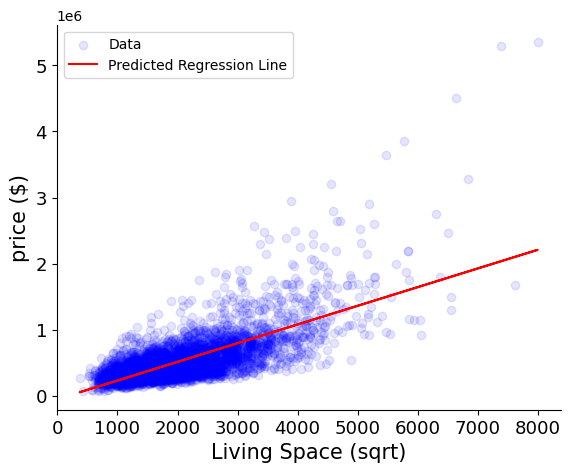

In [16]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='blue',label="Data",alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqrt)", fontsize=15)
plt.ylabel("price ($)", fontsize =15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('Output/Predicted Regression Line')

### In this preceding case,we have used a simple linear regression and found a poor fit because the data looks scattered around the line.
To improve the model, we have to add more features and by adding more features, we will be dealing with multiple regression

### Step1:check the correlation matrix before fitting a multiple regression

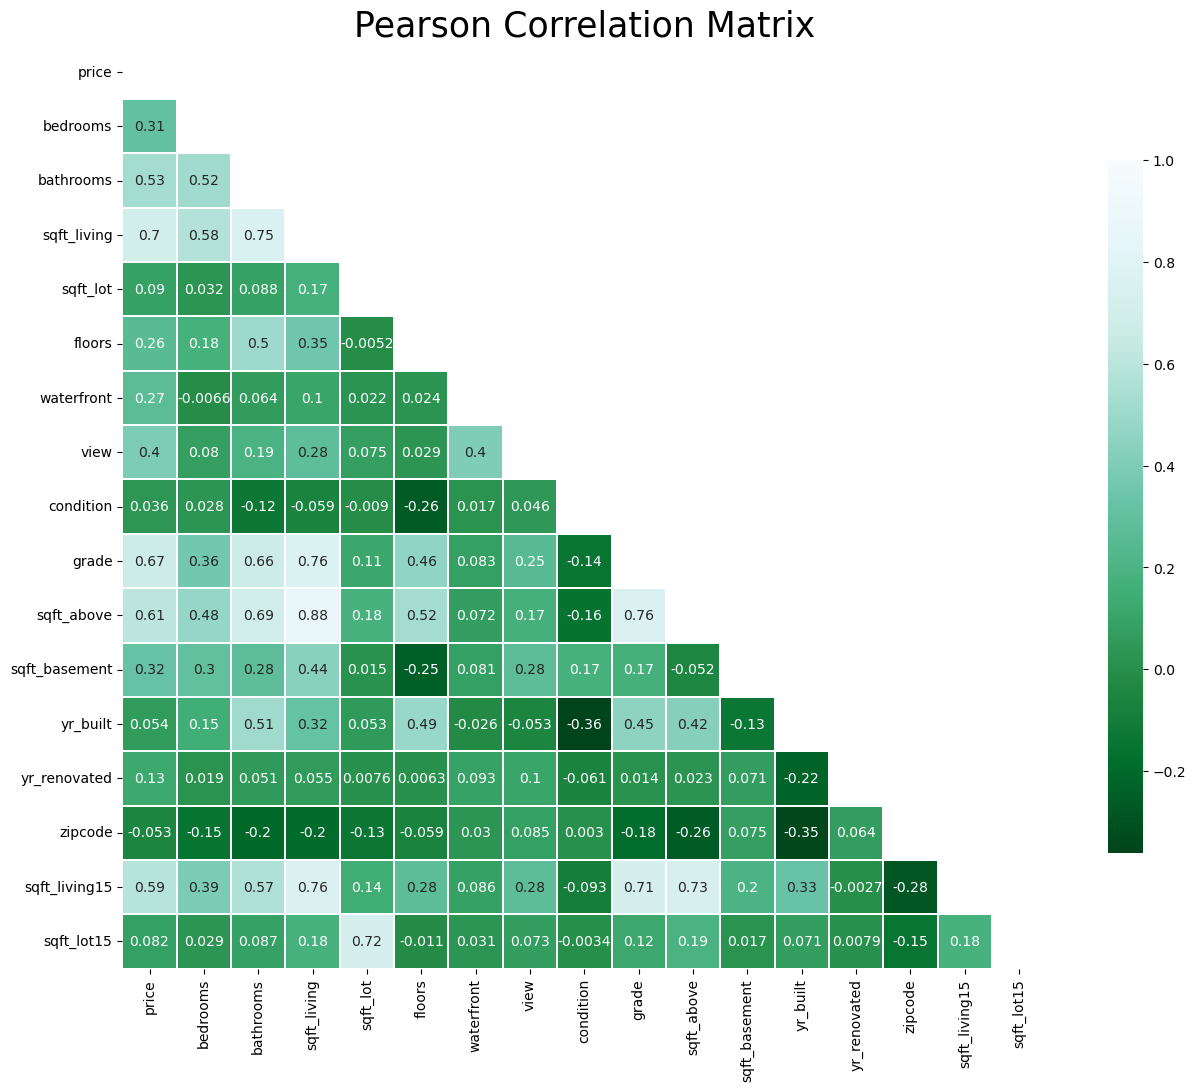

In [17]:

features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
           'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
           'sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": 0.75})
plt.savefig('Output/Pearson Correlation Matrix')

Now lets compare features like bedrooms,floors,bathrooms vs price comparison.We will use boxplot

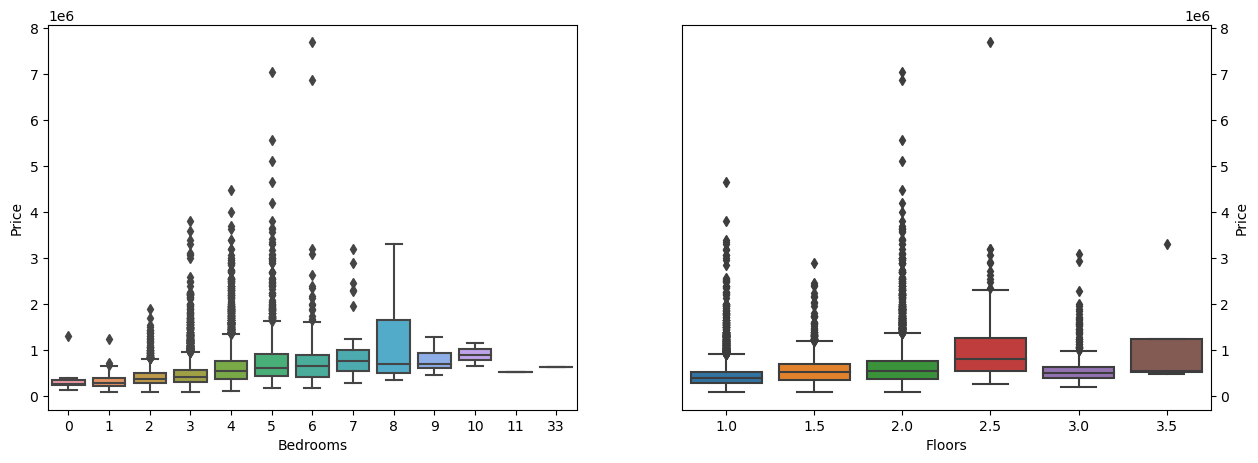

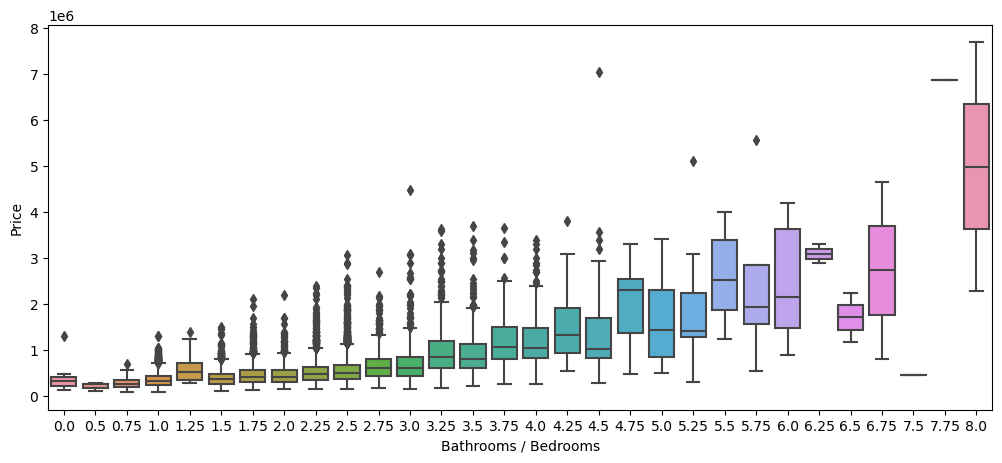

In [18]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=train_data['bedrooms'], y=train_data['price'], ax=axes[0])
sns.boxplot(x=train_data['floors'], y=train_data['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axes = plt.subplots(1, 1, figsize=(12.18, 5))
sns.boxplot(x=train_data['bathrooms'], y=train_data['price'], ax=axes)
axes.set(xlabel='Bathrooms / Bedrooms', ylabel='Price')
plt.savefig('Output/Boxplot-for-some-features')

Now lets create a complex model manually

In [10]:
def adjustedR2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

features1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features1], train_data['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred1 = complex_model_1.predict(test_data[features1])
msecm1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred1)), '.3f')
rtrcm1 = format(complex_model_1.score(train_data[features1], train_data['price']), '.3f')
artrcm1 = format(adjustedR2(complex_model_1.score(train_data[features1], train_data['price']),
                            train_data.shape[0], len(features1)), '.3f')
rtecm1 = format(complex_model_1.score(test_data[features1], test_data['price']), '.3f')
artecm1 = format(adjustedR2(complex_model_1.score(test_data[features1], test_data['price']),
                            test_data.shape[0], len(features1)), '.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model = 1', '_', msecm1, rtrcm1, artrcm1, rtecm1, artecm1]
evaluation.sort_values(by='R-squared (test)', ascending=False)


Intercept: -57221293.13485892
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


,Model,Details,Mean Squared Error(MSE),R-squared(training),Adjusted R-squared(training),R-squared (test),Adjusted R-squared (test)
1,Complex Model = 1,_,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


from the preceding output,you can say that the your first complex model descreased the MSE to 248514.011

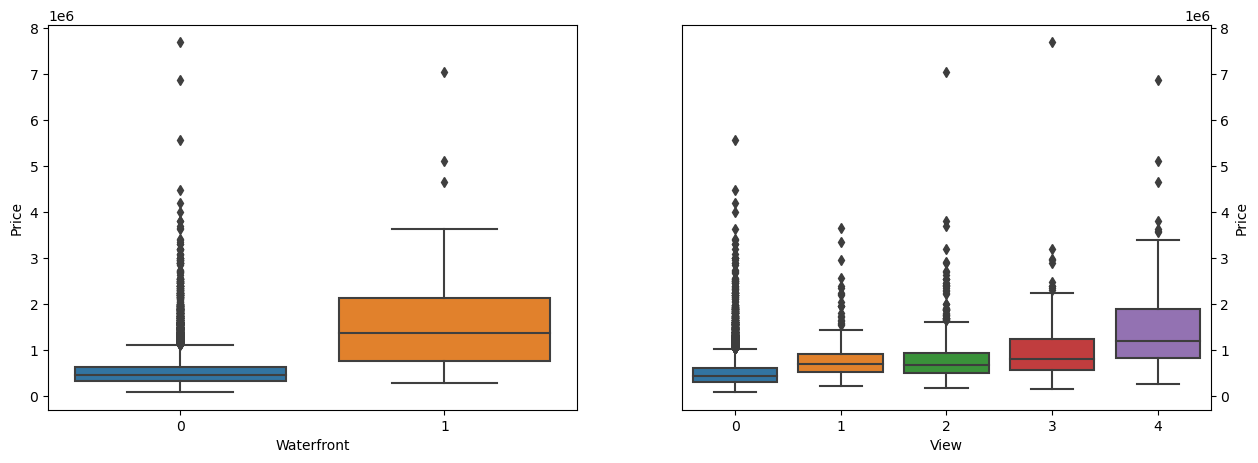

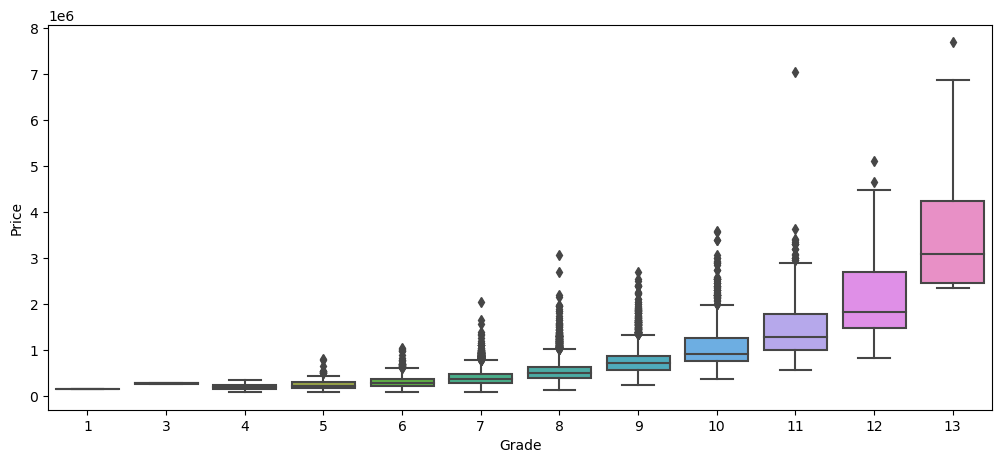

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=train_data['waterfront'], y=train_data['price'], ax=axes[0])
sns.boxplot(x=train_data['view'], y=train_data['price'], ax=axes[1])
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, ax = plt.subplots(1, 1, figsize=(12.18, 5))
sns.boxplot(x=train_data['grade'], y=train_data['price'], ax=ax)
ax.set(xlabel='Grade', ylabel='Price')
plt.savefig('Output/Grade')

Lets add more features and repeat the same steps

In [12]:
features2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features2], train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred2 = complex_model_2.predict(test_data[features2])
msecm2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred2)), '.3f')
rtrcm2 = format(complex_model_2.score(train_data[features2], train_data['price']), '.3f')
artrcm2 = format(adjustedR2(complex_model_2.score(train_data[features2], train_data['price']),
                            train_data.shape[0], len(features2)), '.3f')
rtecm2 = format(complex_model_2.score(test_data[features2], test_data['price']), '.3f')
artecm2 = format(adjustedR2(complex_model_2.score(test_data[features2], test_data['price']),
                            test_data.shape[0], len(features2)), '.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Complex Model-2', '_', msecm2, rtrcm2, artrcm2, rtecm2, artecm2]
evaluation.sort_values(by='R-squared (test)', ascending=False)


Intercept: 13559209.611223737
Coefficients: [-3.80981692e+04  5.03031727e+04  1.71370475e+02 -2.68019419e-01
  2.21944912e+04  5.53865017e+05  4.70338164e+04  1.23642184e+05
 -3.88306990e+03 -6.82180496e+01]


,Model,Details,Mean Squared Error(MSE),R-squared(training),Adjusted R-squared(training),R-squared (test),Adjusted R-squared (test)
2,Complex Model-2,_,210486.689,0.651,0.650,0.655,0.654
1,Complex Model = 1,_,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


Observation:from the preceding results,you can see that adding more features in our complex model 2 is decreasing the regression log.
Now in our case is 210486.689

### Applying a polynomial transformation may give us a better results

In [13]:
polyfeat = PolynomialFeatures(degree=2)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly1 = format(np.sqrt(metrics.mean_squared_error(test_data['price'], predp)), '.3f')
rtrpoly1 = format(poly.score(X_trainpoly, train_data['price']), '.3f')
rtepoly1 = format(poly.score(X_testpoly, test_data['price']), '.3f')


polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

predp = poly.predict(X_testpoly)
msepoly2 = format(np.sqrt(metrics.mean_squared_error(test_data['price'], predp)), '.3f')
rtrpoly2 = format(poly.score(X_trainpoly, train_data['price']), '.3f')
rtepoly2 = format(poly.score(X_testpoly, test_data['price']), '.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Polynomial Regression', 'degree=2', msepoly1, rtrpoly1, '-', rtepoly1, '-']
evaluation.loc[r+1] = ['Polynomial Regression', 'degree=3', msepoly2, rtrpoly2, '-', rtepoly2, '-']
evaluation.sort_values(by='R-squared (test)', ascending=False)


,Model,Details,Mean Squared Error(MSE),R-squared(training),Adjusted R-squared(training),R-squared (test),Adjusted R-squared (test)
4,Polynomial Regression,degree=3,189235.269,0.749,-,0.721,-
3,Polynomial Regression,degree=2,190980.547,0.730,-,0.716,-
2,Complex Model-2,_,210486.689,0.651,0.650,0.655,0.654
1,Complex Model = 1,_,248514.011,0.514,0.514,0.519,0.518
0,Simple Model,-,254289.149,0.492,-,0.496,-


### Observation: in our case it seems that the 3rd degree polynomial regression model is the best model for our problem with 72.1% R-squared value,now that completes our goal

In [15]:
import pickle

polyfeat = PolynomialFeatures(degree=3)
X_trainpoly = polyfeat.fit_transform(train_data[features2])
X_testpoly = polyfeat.transform(test_data[features2])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

# Save the model
with open('polynomial_regression_model.pkl', 'wb') as file:
    pickle.dump(poly, file)


## End of Project